In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import umap

In [55]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_all_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_all_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_all_mm_cl= df_combined_all_mm.drop(columns=['label', 'filename'])
df_combined_all_z_cl= df_combined_all_z.drop(columns=['label', 'filename'])

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

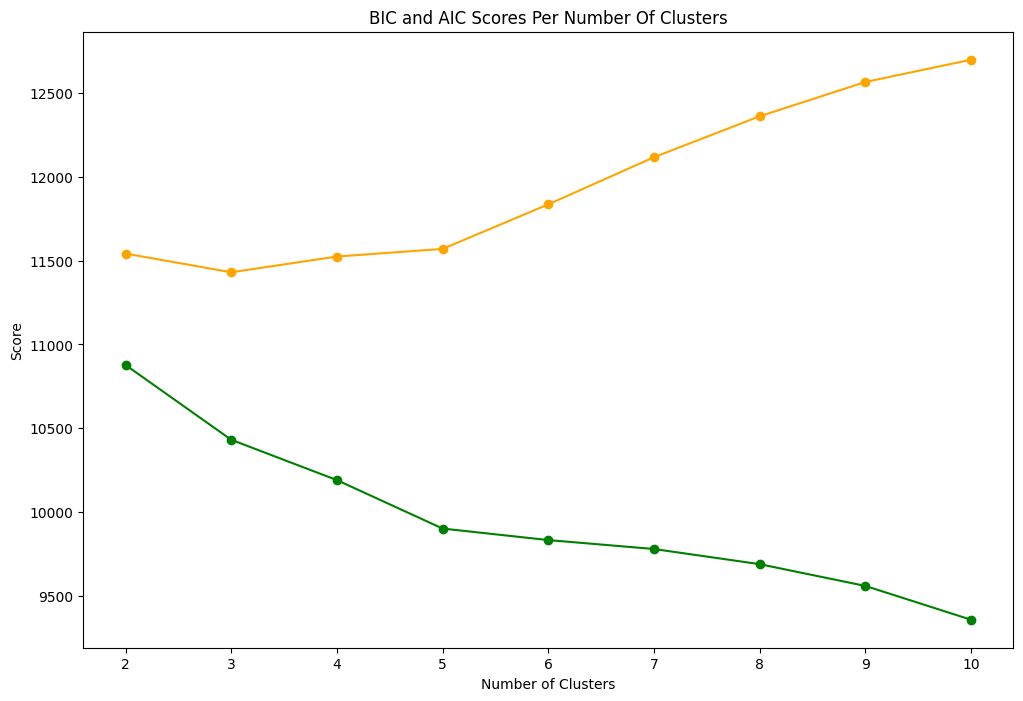

In [56]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_all_z_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_all_z_cl))
    aic_score.append(gm.aic(df_combined_all_z_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')


In [174]:
n_components = 4# Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_z.items():
    gmm_model.fit(df_combined_all_z_cl)

In [175]:
covariances_z = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_z.items()}

In [176]:
predictions_z = {cov_type: gmm_model.predict(df_combined_all_z_cl)
               for cov_type, gmm_model in gmm_models_z.items()}

Covariance Matrix (full - Component):
[[ 1.02996792e+00 -1.36994771e-01  5.09611361e-02 -8.42351610e-02
  -5.73842595e-02 -1.49931701e-02 -1.94301951e-01 -1.32830144e-01
   6.18219404e-02  2.33407846e-02 -1.28311716e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.19696486e-02]
 [-1.36994771e-01  6.18798248e-01  5.78952983e-01 -1.56043969e-02
   1.95379061e-02 -4.31955231e-01  6.90461320e-02 -2.83584503e-02
  -4.55539188e-01 -3.87620020e-02  4.54870481e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.75864938e-01]
 [ 5.09611361e-02  5.78952983e-01  9.58539980e-01 -1.71132696e-01
   1.34775736e-01 -3.55209404e-01 -2.37805925e-02 -2.76366603e-02
  -5.35215365e-01 -6.73808380e-02  5.29837706e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.05510061e-01]
 [-8.42351610e-02 -1.56043969e-02 -1.71132696e-01  6.14182879e-01
  -2.22721146e-01 -1.89982225e-01  3.55531437e-01 -7.57534836e-02
  -3.55085251e-02 -5.71963744e-02  6.93687583e-02  0.00000000e+00
   0.00000000e+00

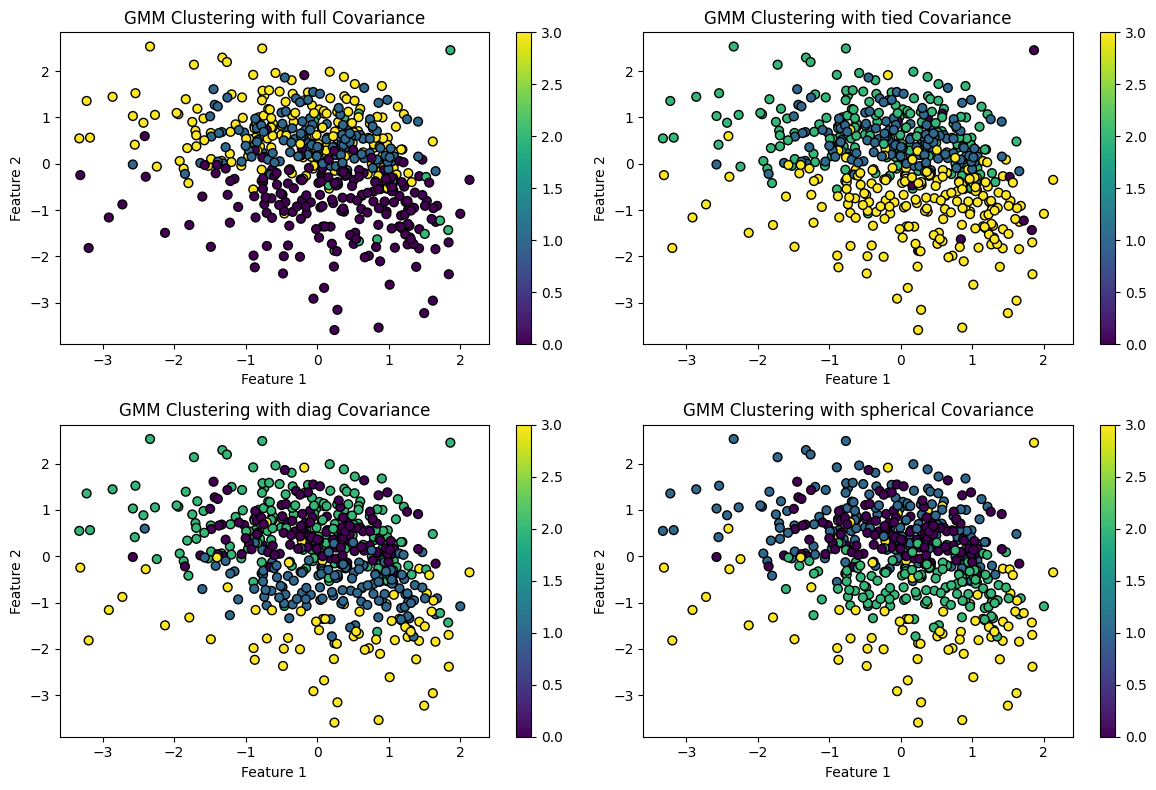

In [177]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_all_z_cl.iloc[:, 0], df_combined_all_z_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_z[cov_type][0]}')

plt.tight_layout()
plt.show()

In [178]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_all_z_cl, predictions_z[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.285
Tied covariance: Silhouette Score = 0.282
Diag covariance: Silhouette Score = 0.268
Spherical covariance: Silhouette Score = 0.267


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


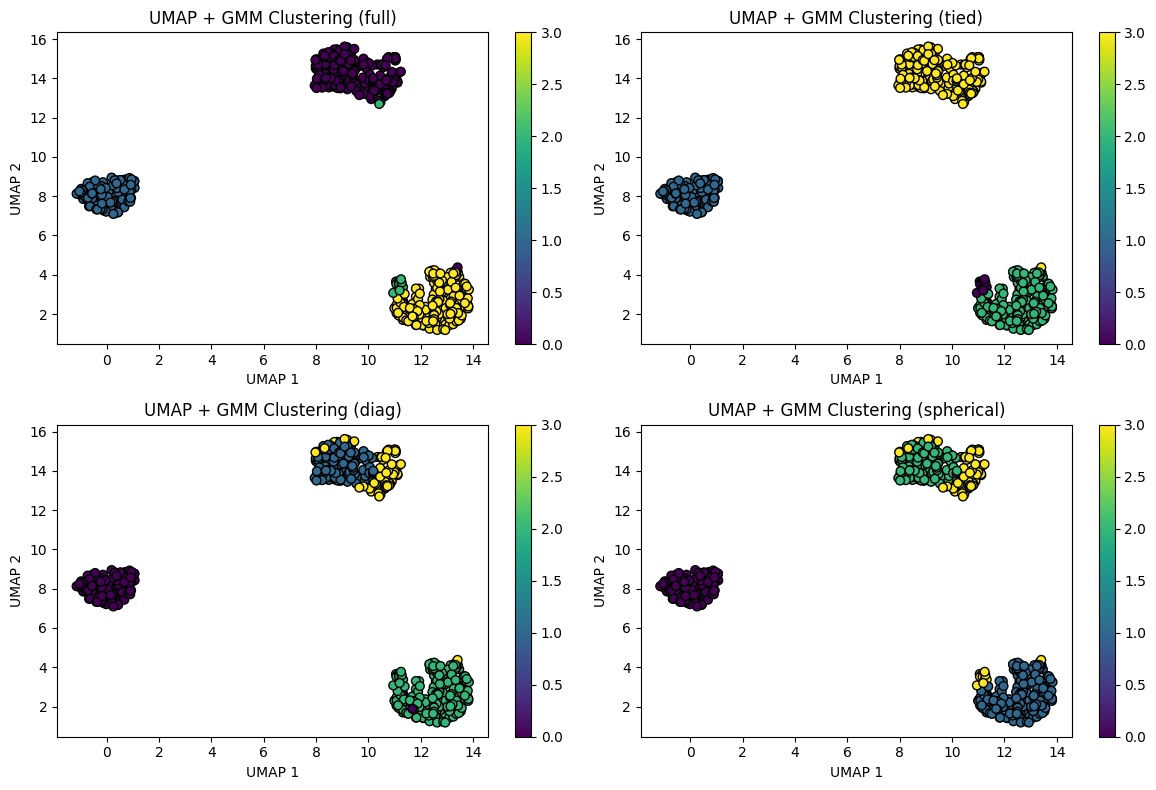

In [179]:
reducer = umap.UMAP(n_neighbors=30, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_combined_all_z_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_z.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_z[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [180]:
df_combined_all_z_cl['predictions_z_full'] = predictions_z['full']
df_combined_all_z_cl['predictions_z_tied'] = predictions_z['tied']
df_combined_all_z_cl['predictions_z_diag'] = predictions_z['diag']
df_combined_all_z_cl['predictions_z_spherical'] = predictions_z['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_all_z['label'], df_combined_all_z_cl['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])


# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1   2    3
Label                            
higher          142  114   0   12
smaller          56   18  17  178

Contingency Table for Tied Covariance:
Cluster (tied)   0    1    2    3
Label                            
higher           0  114   12  142
smaller         14   18  179   58

Contingency Table for Diagonal Covariance:
Cluster (diag)    0    1    2   3
Label                            
higher          115  113   11  29
smaller          18   18  193  40

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1    2   3
Label                                 
higher               114   12  112  30
smaller               18  178   18  55


Siempre  hay un cluster con más cantidad de smaller y otro con mas cantidad de higher con tres clusteres, pero si uso 4 en algunos casos puedo ver la separacion entre los dos grupos de higher.


Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

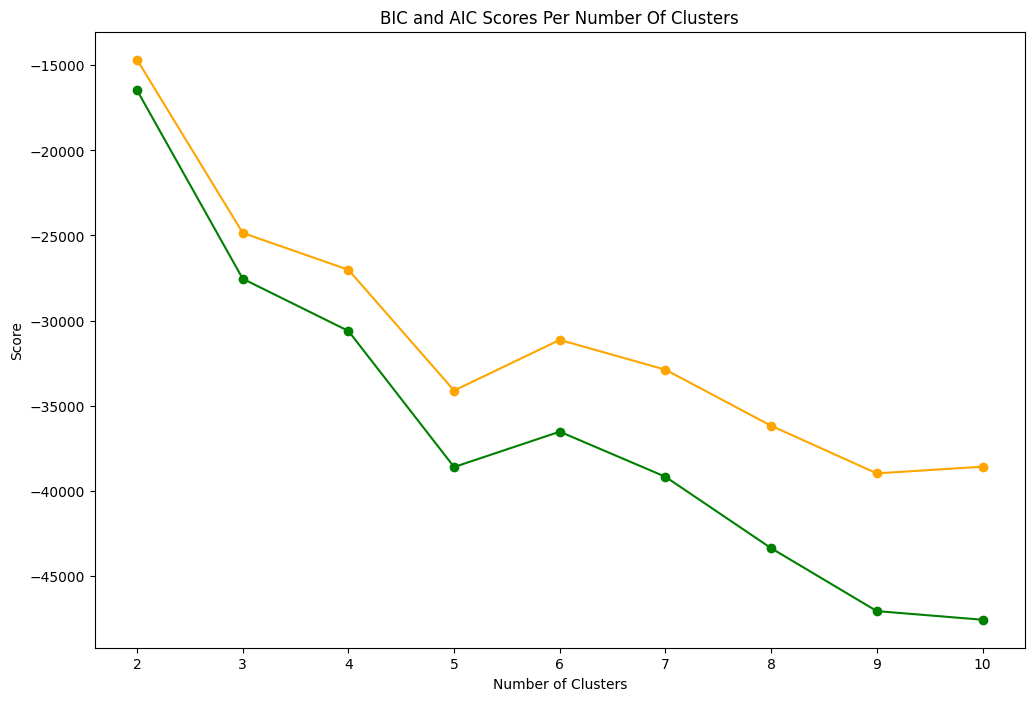

In [133]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_all_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_all_mm_cl))
    aic_score.append(gm.aic(df_combined_all_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [134]:
n_components = 4  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_combined_all_mm_cl)

In [135]:
covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

predictions_mm = {cov_type: gmm_model.predict(df_combined_all_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 3.74620489e-02 -4.75976532e-03 -1.47914729e-03 -2.66387716e-03
   1.41275159e-03 -1.08950278e-03  2.38323751e-03  2.82608646e-03
   2.36398024e-04 -1.45904561e-03 -1.87622116e-03  1.79288744e-02
   1.45922100e-03 -8.15007944e-04  3.25830137e-03  3.66580534e-03
   0.00000000e+00  2.20658434e-03  7.93332880e-03]
 [-4.75976532e-03  1.14505608e-02  4.01797503e-03  2.50700579e-03
  -4.36475348e-03  1.11794975e-03 -3.56911194e-03 -5.42099930e-03
  -6.32232270e-03 -5.66685954e-03  5.91362038e-03 -1.25232225e-02
   4.20089630e-04 -1.66681244e-03  8.61688605e-04  1.69509482e-03
   0.00000000e+00  1.27500519e-03 -8.58025064e-03]
 [-1.47914729e-03  4.01797503e-03  4.30578394e-03  8.76864665e-04
  -7.94854215e-04  1.40136278e-03 -1.94040666e-03 -2.86527564e-03
  -2.44554187e-03 -1.96834654e-03  2.31153833e-03 -8.73673221e-03
  -1.91130268e-03 -1.30012027e-03  9.31924288e-04  1.58198442e-03
   0.00000000e+00  3.49328711e-03 -8.61719210e-03]
 [-2.66387716e-03

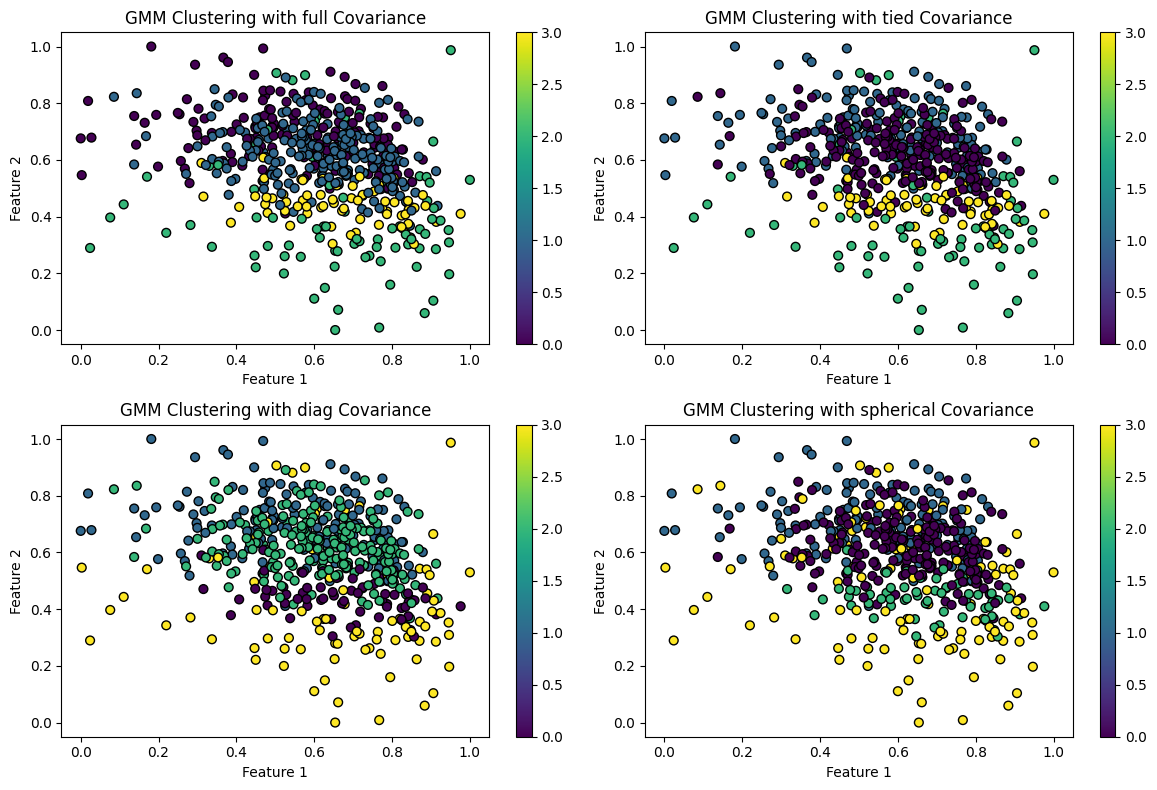

In [136]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_all_mm_cl.iloc[:, 0], df_combined_all_mm_cl.iloc[:, 1], c=predictions_mm[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


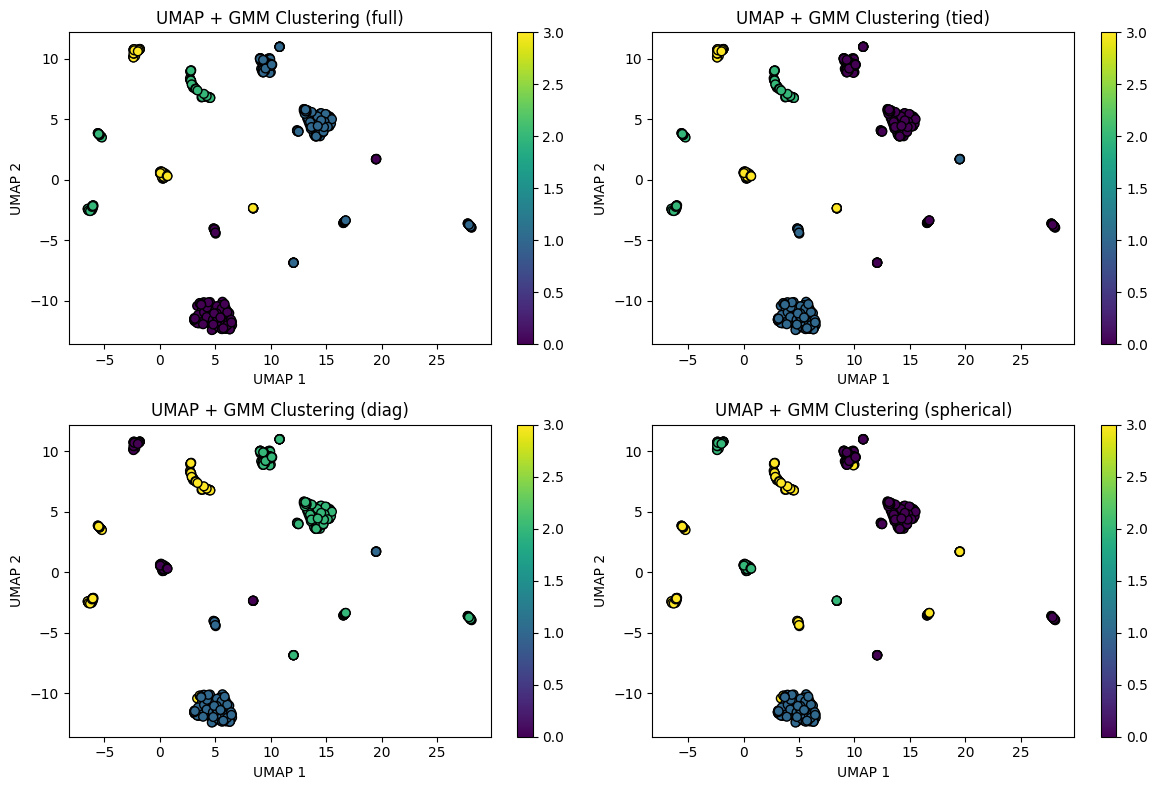

In [137]:
reducer = umap.UMAP(n_neighbors=10, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_combined_all_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_mm[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [138]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_all_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.674
Tied covariance: Silhouette Score = 0.674
Diag covariance: Silhouette Score = 0.671
Spherical covariance: Silhouette Score = 0.627


In [139]:
df_combined_all_mm_cl['predictions_z_full'] = predictions_mm['full']
df_combined_all_mm_cl['predictions_z_tied'] = predictions_mm['tied']
df_combined_all_mm_cl['predictions_z_diag'] = predictions_mm['diag']
df_combined_all_mm_cl['predictions_z_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_z_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])


# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0    1   2   3
Label                           
higher            7  175  25  61
smaller         163   42  60   4

Contingency Table for Tied Covariance:
Cluster (tied)    0    1   2   3
Label                           
higher          175    7  25  61
smaller          42  163  60   4

Contingency Table for Diagonal Covariance:
Cluster (diag)   0    1    2   3
Label                           
higher          61    7  175  25
smaller          4  161   42  62

Contingency Table for Spherical Covariance:
Cluster (spherical)    0    1   2   3
Label                                
higher               167    3  60  38
smaller               35  147   3  84


se reduce la dimensionalidad con umap

minmax

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

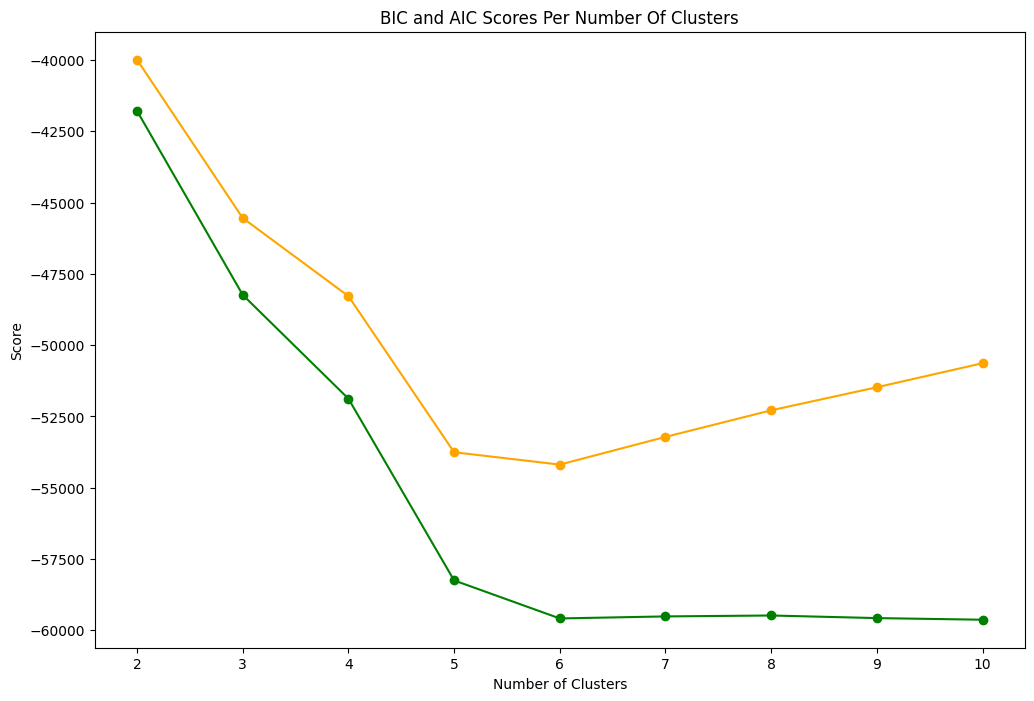

In [140]:
# Set up a range of cluster numbers to try
n_range = range(2,11)
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(df_combined_all_mm_cl)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(df_combined_all_mm_cl))
    aic_score.append(gm.aic(df_combined_all_mm_cl))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

In [194]:
n_components = 4  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models_mm.items():
    gmm_model.fit(df_combined_all_mm_cl)

In [195]:
covariances_mm = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models_mm.items()}

In [196]:
predictions_mm = {cov_type: gmm_model.predict(df_combined_all_mm_cl)
               for cov_type, gmm_model in gmm_models_mm.items()}

Covariance Matrix (full - Component):
[[ 2.12498735e-02 -3.61735069e-03  2.78592622e-04 -1.32164879e-03
   1.51456302e-03  1.87845073e-03 -1.26924606e-03  2.51920309e-04
   2.51810552e-03  1.91961775e-04 -3.13198256e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.61735069e-03  9.48971924e-03  4.60436745e-03 -6.66961642e-04
  -7.64190683e-04 -2.28778612e-03 -1.27488052e-03 -2.55764752e-03
  -6.59827203e-03 -5.14663371e-03  7.42697845e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.78592622e-04  4.60436745e-03  9.31588011e-03 -2.75422840e-03
   1.27007694e-03  3.87823448e-04 -4.00446751e-03 -2.11394249e-03
  -2.79000259e-03 -5.00262258e-03  4.43902770e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.32164879e-03

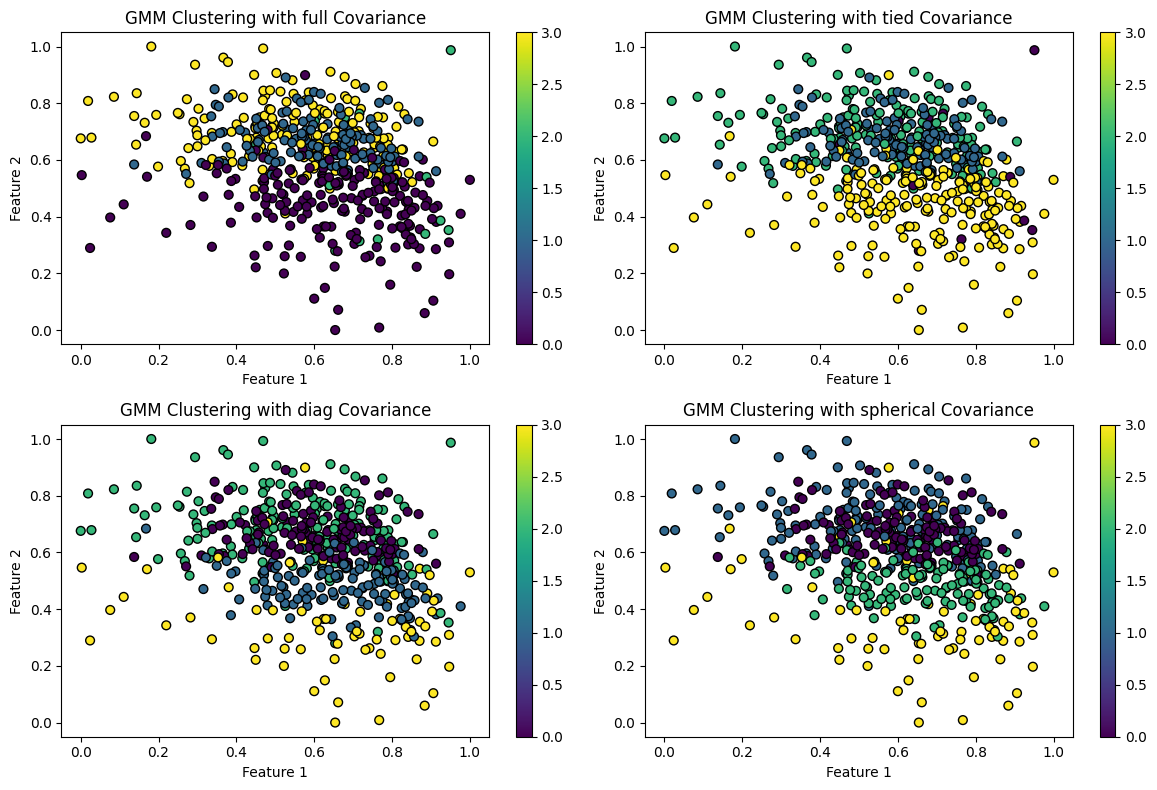

In [197]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_combined_all_mm_cl.iloc[:, 0], df_combined_all_mm_cl.iloc[:, 1], c=predictions_z[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    
    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances_mm[cov_type][0]}')

plt.tight_layout()
plt.show()

In [198]:
print("\n--- Silhouette Scores por tipo de covarianza ---")
for cov_type in covariance_types:
    score = silhouette_score(df_combined_all_mm_cl, predictions_mm[cov_type])
    print(f"{cov_type.capitalize()} covariance: Silhouette Score = {score:.3f}")


--- Silhouette Scores por tipo de covarianza ---
Full covariance: Silhouette Score = 0.740
Tied covariance: Silhouette Score = 0.740
Diag covariance: Silhouette Score = 0.740
Spherical covariance: Silhouette Score = 0.740


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


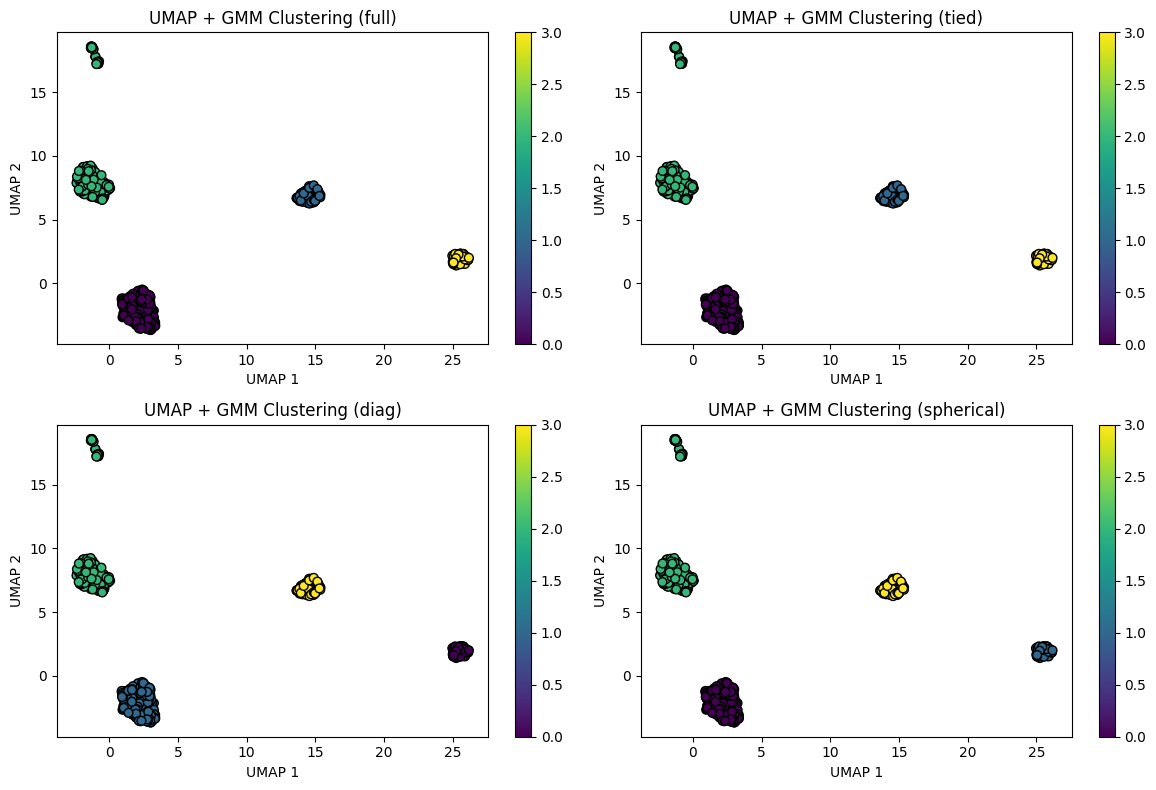

In [199]:
reducer = umap.UMAP(n_neighbors=35, n_components=2,random_state=42)
embedding = reducer.fit_transform(df_combined_all_mm_cl)

plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models_mm.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], 
                c=predictions_mm[cov_type], 
                cmap='viridis', edgecolors='k', s=40)
    plt.title(f'UMAP + GMM Clustering ({cov_type})')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

In [200]:
df_combined_all_mm_cl['predictions_mm_full'] = predictions_mm['full']
df_combined_all_mm_cl['predictions_mm_tied'] = predictions_mm['tied']
df_combined_all_mm_cl['predictions_mm_diag'] = predictions_mm['diag']
df_combined_all_mm_cl['predictions_mm_spherical'] = predictions_mm['spherical']

# Crear las tablas de contingencia para cada tipo de covarianza
contingency_full = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_mm_full'], rownames=['Label'], colnames=['Cluster (full)'])
contingency_tied = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_mm_tied'], rownames=['Label'], colnames=['Cluster (tied)'])
contingency_diag = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_mm_diag'], rownames=['Label'], colnames=['Cluster (diag)'])
contingency_spherical = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm_cl['predictions_mm_spherical'], rownames=['Label'], colnames=['Cluster (spherical)'])


# Mostrar las tablas de contingencia
print("Contingency Table for Full Covariance:")
print(contingency_full)

print("\nContingency Table for Tied Covariance:")
print(contingency_tied)

print("\nContingency Table for Diagonal Covariance:")
print(contingency_diag)

print("\nContingency Table for Spherical Covariance:")
print(contingency_spherical)

Contingency Table for Full Covariance:
Cluster (full)    0   1    2   3
Label                           
higher          167  25   15  61
smaller          35  60  170   4

Contingency Table for Tied Covariance:
Cluster (tied)    0   1    2   3
Label                           
higher          167  25   15  61
smaller          35  60  170   4

Contingency Table for Diagonal Covariance:
Cluster (diag)   0    1    2   3
Label                           
higher          61  167   15  25
smaller          4   35  170  60

Contingency Table for Spherical Covariance:
Cluster (spherical)    0   1    2   3
Label                                
higher               167  61   15  25
smaller               35   4  170  60


reduccion de la dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Covariance Matrix (full - Component 0):
[[0.44484284 0.01168212]
 [0.01168212 0.14642649]]
Covariance Matrix (tied - Component 0):
[0.62727794 0.02832407]
Covariance Matrix (diag - Component 0):
[0.44519801 0.14606441]
Covariance Matrix (spherical - Component 0):
0.3517329710340345


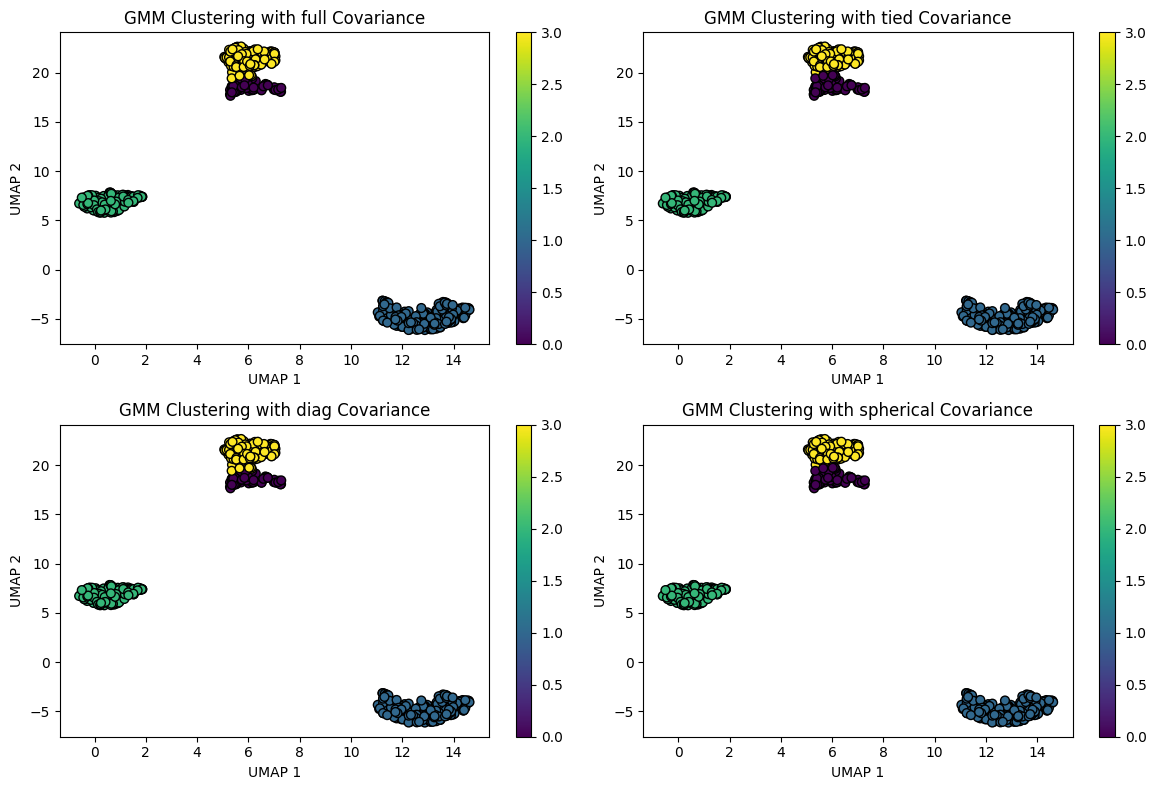

In [188]:
reducer = umap.UMAP(n_neighbors=20, n_components=2, random_state=42)
model_umap_all_z= reducer.fit_transform(df_combined_all_z_cl)

# Clustering con GMM
n_components = 4
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_z_umap = {
    cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
    for cov_type in covariance_types
}

# Entrenar modelos
for cov_type, gmm_model in gmm_models_z_umap.items():
    gmm_model.fit(model_umap_all_z)

# Obtener matrices de covarianza
covariances_z_umap = {
    cov_type: gmm_model.covariances_ for cov_type, gmm_model in gmm_models_z_umap.items()
}

# Obtener predicciones
predictions_z_umap = {
    cov_type: gmm_model.predict(model_umap_all_z) for cov_type, gmm_model in gmm_models_z_umap.items()
}

# Graficar
plt.figure(figsize=(12, 8))
for i, cov_type in enumerate(covariance_types, 1):
    plt.subplot(2, 2, i)
    plt.scatter(
        model_umap_all_z[:, 0], model_umap_all_z[:, 1],
        c=predictions_z_umap[cov_type],
        cmap='viridis', edgecolors='k', s=40
    )
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component 0):\n{covariances_z_umap[cov_type][0]}')

plt.tight_layout()
plt.show()

In [189]:
df_combined_all_z['gmm_umap_full'] = predictions_z_umap['full']
df_combined_all_z['gmm_umap_tied'] = predictions_z_umap['tied']
df_combined_all_z['gmm_umap_diag'] = predictions_z_umap['diag']
df_combined_all_z['gmm_umap_spherical'] = predictions_z_umap['spherical']

contingency_umap_full = pd.crosstab(df_combined_all_z['label'], df_combined_all_z['gmm_umap_full'], rownames=['Label'], colnames=['Cluster (UMAP - full)'])
contingency_umap_tied = pd.crosstab(df_combined_all_z['label'], df_combined_all_z['gmm_umap_tied'], rownames=['Label'], colnames=['Cluster (UMAP - tied)'])
contingency_umap_diag = pd.crosstab(df_combined_all_z['label'], df_combined_all_z['gmm_umap_diag'], rownames=['Label'], colnames=['Cluster (UMAP - diag)'])
contingency_umap_spherical = pd.crosstab(df_combined_all_z['label'], df_combined_all_z['gmm_umap_spherical'], rownames=['Label'], colnames=['Cluster (UMAP - spherical)'])

print("Contingency Table for UMAP + Full Covariance:")
print(contingency_umap_full)

print("\nContingency Table for UMAP + Tied Covariance:")
print(contingency_umap_tied)

print("\nContingency Table for UMAP + Diagonal Covariance:")
print(contingency_umap_diag)

print("\nContingency Table for UMAP + Spherical Covariance:")
print(contingency_umap_spherical)

Contingency Table for UMAP + Full Covariance:
Cluster (UMAP - full)   0    1    2    3
Label                                   
higher                 20   12  114  122
smaller                40  193   18   18

Contingency Table for UMAP + Tied Covariance:
Cluster (UMAP - tied)   0    1    2    3
Label                                   
higher                 25   12  114  117
smaller                40  193   18   18

Contingency Table for UMAP + Diagonal Covariance:
Cluster (UMAP - diag)   0    1    2    3
Label                                   
higher                 20   12  114  122
smaller                40  193   18   18

Contingency Table for UMAP + Spherical Covariance:
Cluster (UMAP - spherical)   0    1    2    3
Label                                        
higher                      27   12  114  115
smaller                     40  193   18   18


In [190]:
# Calcular silueta para cada tipo de covarianza usando UMAP
for cov_type in covariance_types:
    labels = predictions_z_umap[cov_type]
    score = silhouette_score(model_umap_all_z, labels)
    print(f"Silhouette Score (UMAP + GMM {cov_type}): {score:.4f}")

Silhouette Score (UMAP + GMM full): 0.8022
Silhouette Score (UMAP + GMM tied): 0.8058
Silhouette Score (UMAP + GMM diag): 0.8022
Silhouette Score (UMAP + GMM spherical): 0.8055


minmax+ reduc umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Covariance Matrix (full - Component 0):
[[ 2.86773883 -9.43851442]
 [-9.43851442 33.47323667]]
Covariance Matrix (tied - Component 0):
[ 0.98797574 -1.97373388]
Covariance Matrix (diag - Component 0):
[ 2.86773888 33.47323729]
Covariance Matrix (spherical - Component 0):
18.193222952763115


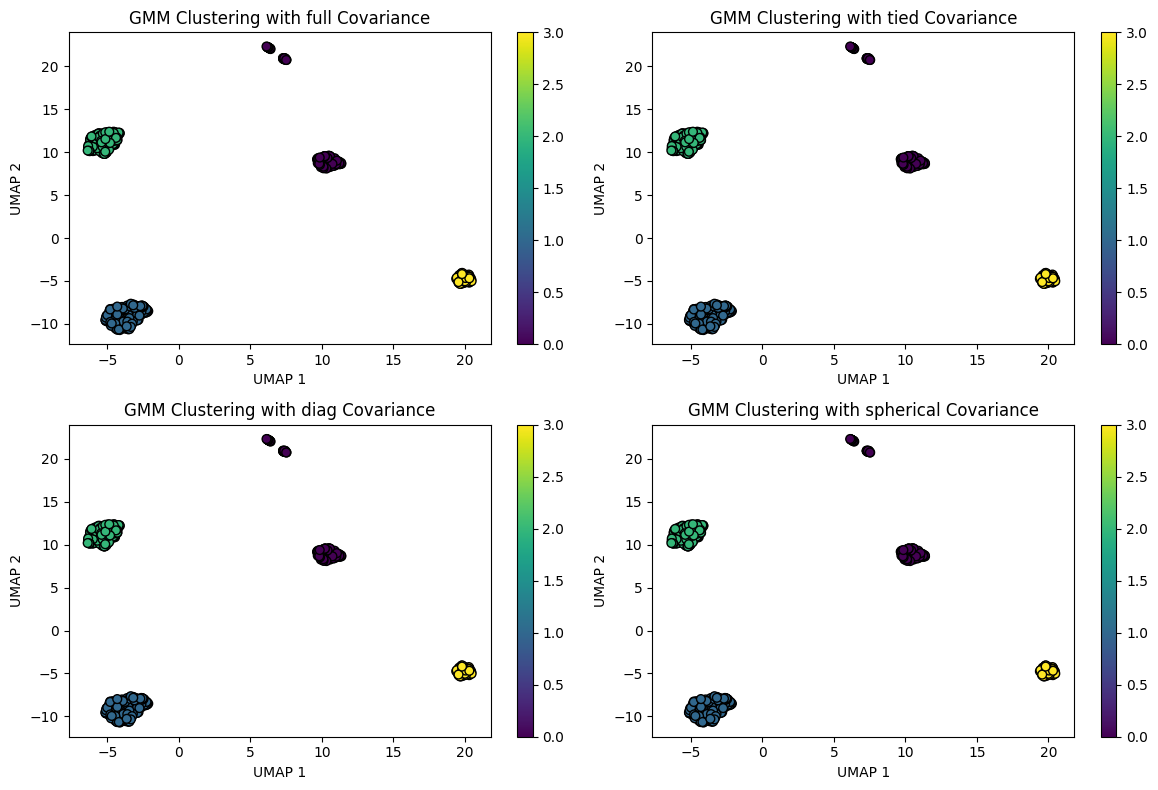

In [191]:
reducer = umap.UMAP(n_neighbors=30, n_components=2, random_state=42)
model_umap_all_mm= reducer.fit_transform(df_combined_all_mm_cl)

# Clustering con GMM
n_components = 4
covariance_types = ['full', 'tied', 'diag', 'spherical']

gmm_models_mm_umap = {
    cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
    for cov_type in covariance_types
}

# Entrenar modelos
for cov_type, gmm_model in gmm_models_mm_umap.items():
    gmm_model.fit(model_umap_all_mm)

# Obtener matrices de covarianza
covariances_mm_umap = {
    cov_type: gmm_model.covariances_ for cov_type, gmm_model in gmm_models_mm_umap.items()
}

# Obtener predicciones
predictions_mm_umap = {
    cov_type: gmm_model.predict(model_umap_all_mm) for cov_type, gmm_model in gmm_models_mm_umap.items()
}

# Graficar
plt.figure(figsize=(12, 8))
for i, cov_type in enumerate(covariance_types, 1):
    plt.subplot(2, 2, i)
    plt.scatter(
        model_umap_all_mm[:, 0], model_umap_all_mm[:, 1],
        c=predictions_mm_umap[cov_type],
        cmap='viridis', edgecolors='k', s=40
    )
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component 0):\n{covariances_mm_umap[cov_type][0]}')

plt.tight_layout()
plt.show()

In [192]:
df_combined_all_mm['gmm_umap_full'] = predictions_mm_umap['full']
df_combined_all_mm['gmm_umap_tied'] = predictions_mm_umap['tied']
df_combined_all_mm['gmm_umap_diag'] = predictions_mm_umap['diag']
df_combined_all_mm['gmm_umap_spherical'] = predictions_mm_umap['spherical']

contingency_umap_full = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm['gmm_umap_full'], rownames=['Label'], colnames=['Cluster (UMAP - full)'])
contingency_umap_tied = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm['gmm_umap_tied'], rownames=['Label'], colnames=['Cluster (UMAP - tied)'])
contingency_umap_diag = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm['gmm_umap_diag'], rownames=['Label'], colnames=['Cluster (UMAP - diag)'])
contingency_umap_spherical = pd.crosstab(df_combined_all_mm['label'], df_combined_all_mm['gmm_umap_spherical'], rownames=['Label'], colnames=['Cluster (UMAP - spherical)'])

print("Contingency Table for UMAP + Full Covariance:")
print(contingency_umap_full)

print("\nContingency Table for UMAP + Tied Covariance:")
print(contingency_umap_tied)

print("\nContingency Table for UMAP + Diagonal Covariance:")
print(contingency_umap_diag)

print("\nContingency Table for UMAP + Spherical Covariance:")
print(contingency_umap_spherical)

Contingency Table for UMAP + Full Covariance:
Cluster (UMAP - full)   0    1    2   3
Label                                  
higher                 37  167    3  61
smaller                83   35  147   4

Contingency Table for UMAP + Tied Covariance:
Cluster (UMAP - tied)   0    1    2   3
Label                                  
higher                 37  167    3  61
smaller                83   35  147   4

Contingency Table for UMAP + Diagonal Covariance:
Cluster (UMAP - diag)   0    1    2   3
Label                                  
higher                 37  167    3  61
smaller                83   35  147   4

Contingency Table for UMAP + Spherical Covariance:
Cluster (UMAP - spherical)   0    1    2   3
Label                                       
higher                      37  167    3  61
smaller                     83   35  147   4


In [193]:
# Calcular silueta para cada tipo de covarianza usando UMAP
for cov_type in covariance_types:
    labels = predictions_mm_umap[cov_type]
    score = silhouette_score(model_umap_all_mm, labels)
    print(f"Silhouette Score (UMAP + GMM {cov_type}): {score:.4f}")

Silhouette Score (UMAP + GMM full): 0.8634
Silhouette Score (UMAP + GMM tied): 0.8634
Silhouette Score (UMAP + GMM diag): 0.8634
Silhouette Score (UMAP + GMM spherical): 0.8634
